<a href="https://colab.research.google.com/github/anpham1331/ECGR4105-Intro-to-ML/blob/main/ECGR_4105_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

path_file = "/content/drive/MyDrive/Colab Notebooks/D3.csv"
df = pd.read_csv(path_file)


#Calculate cost function first, then find the gradient from that cost function,
#then put it in the gradient descent function.
#Set parameters = 0, set learning rate = 0.1 to 0.01. Do for each column

#steps for finding gradient descent:
#1 - Find loss function, predicted value h0
#2 - Init parameters with initial values
#3 - Init learning rate and number of iterations
#4 - Find gradient, and then gradient descent by updating parameters


#Cost Function: 1/2m * sum(h0(xi-yi))^2

#Gradient Descent: theta = theta - learningRate*gradient

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Problem 1: Separated Variables Gradient Descent

#Labels
X1 = df.values[:,0] #Get input values from X1, first column
X2 = df.values[:,1] #Get input values from X2, second column
X3 = df.values[:,2] #Get input values from X3, third column
y = df.values[:,3] #Get output values from y, fourth column
m1 = len(X1) #Number of training examples for X1
m2 = len(X2) #Number of training examples for X2
m3 = len(X3) #Number of training examples for X3
n = len(y) #Number of training examples for y

#Creating the Matrix for X1
X1_0 = np.ones((m1, 1))
X1_1 = X1.reshape(m1, 1)
X1 = np.hstack((X1_0, X1_1))
#Creating the Matrix for X2
X2_0 = np.ones((m2, 1))
X2_1 = X2.reshape(m2, 1)
X2 = np.hstack((X2_0, X2_1))
#Creating the Matrix for X3
X3_0 = np.ones((m3, 1))
X3_1 = X3.reshape(m3, 1)
X3 = np.hstack((X3_0, X3_1))

theta = np.zeros(2)


In [4]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost

    *len(x) in the given J equation below is equal to each varied m value, number of training examples, of each variable
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(X)) * np.sum(sqrErrors)
    return J

In [5]:
# Lets compute the cost for theta values
cost1 = compute_cost(X1, y, theta)
print('The cost for given values for X1 of theta_0 and theta_1 =', cost1)

cost2 = compute_cost(X2, y, theta)
print('The cost for given values for X2 of theta_0 and theta_1 =', cost2)

cost3 = compute_cost(X3, y, theta)
print('The cost for given values for X2 of theta_0 and theta_1 =', cost2)

The cost for given values for X1 of theta_0 and theta_1 = 5.524438459196242
The cost for given values for X2 of theta_0 and theta_1 = 5.524438459196242
The cost for given values for X2 of theta_0 and theta_1 = 5.524438459196242


In [6]:

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [20]:
theta = [0., 0.]
iterations = 1500
alpha = 0.01

theta1, cost_history1 = gradient_descent(X1, y, theta, alpha, iterations)
print('Final value of theta X1 =', theta1)
print('cost_history X1 =', cost_history1)

theta2, cost_history2 = gradient_descent(X2, y, theta, alpha, iterations)
print('Final value of theta X2 =', theta2)
print('cost_history X2 =', cost_history2)

theta3, cost_history3 = gradient_descent(X3, y, theta, alpha, iterations)
print('Final value of theta X3 =', theta3)
print('cost_history X3 =', cost_history3)

Final value of theta X1 = [ 5.71850653 -1.9568206 ]
cost_history X1 = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]
Final value of theta X2 = [0.71988473 0.56390334]
cost_history X2 = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]
Final value of theta X3 = [ 2.78048129 -0.48451631]
cost_history X3 = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


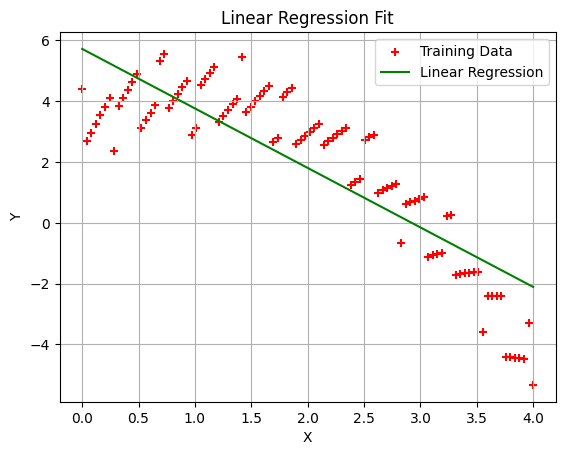

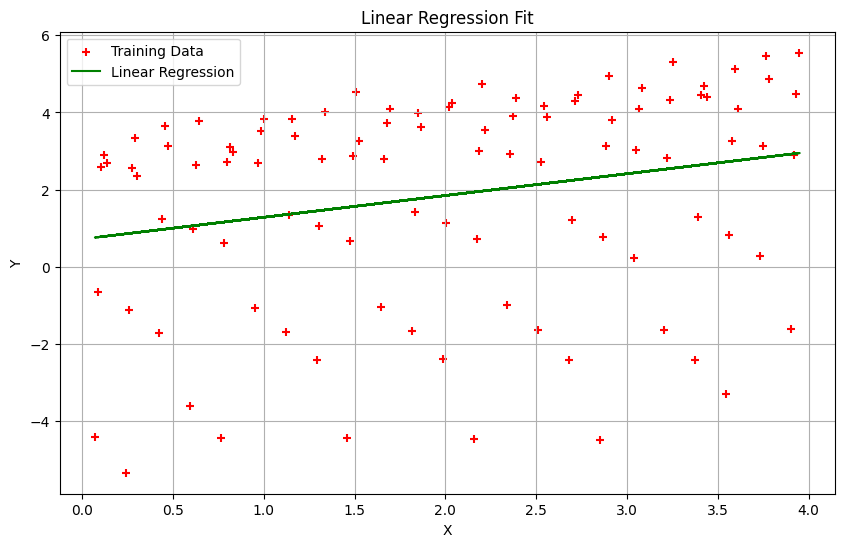

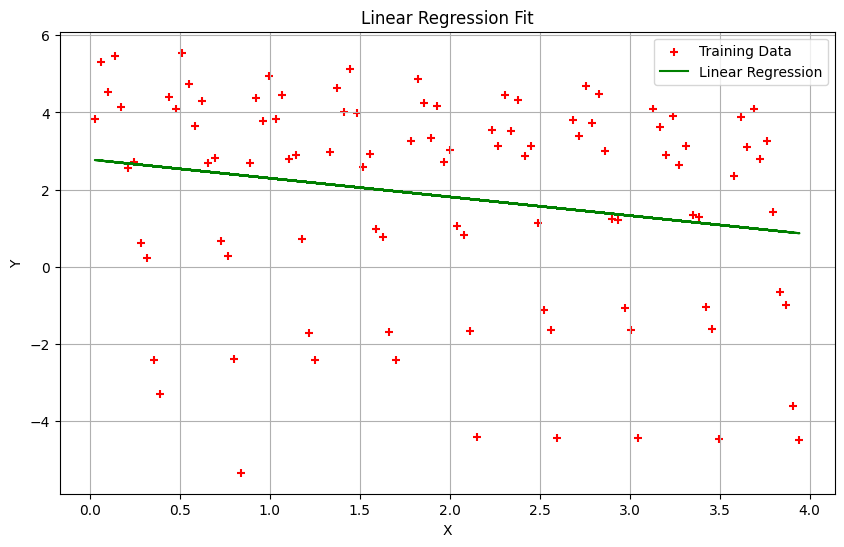

In [8]:
#Graph of X1
plt.scatter(X1[:, 1], y, color='red', marker='+', label='Training Data') # Scatter plot for the training data

plt.plot(X1[:, 1], X1.dot(theta1), color='green', label='Linear Regression') # Line plot for the linear regression model

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

#-----------------------------------------------#

#Graph of X2
plt.scatter(X2[:, 1], y, color='red', marker='+', label='Training Data') # Scatter plot for the training data

plt.plot(X2[:, 1], X2.dot(theta2), color='green', label='Linear Regression') # Line plot for the linear regression model

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

#-----------------------------------------------#

#Graph of X3
plt.scatter(X3[:, 1], y, color='red', marker='+', label='Training Data') # Scatter plot for the training data

plt.plot(X3[:, 1], X3.dot(theta3), color='green', label='Linear Regression') # Line plot for the linear regression model

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

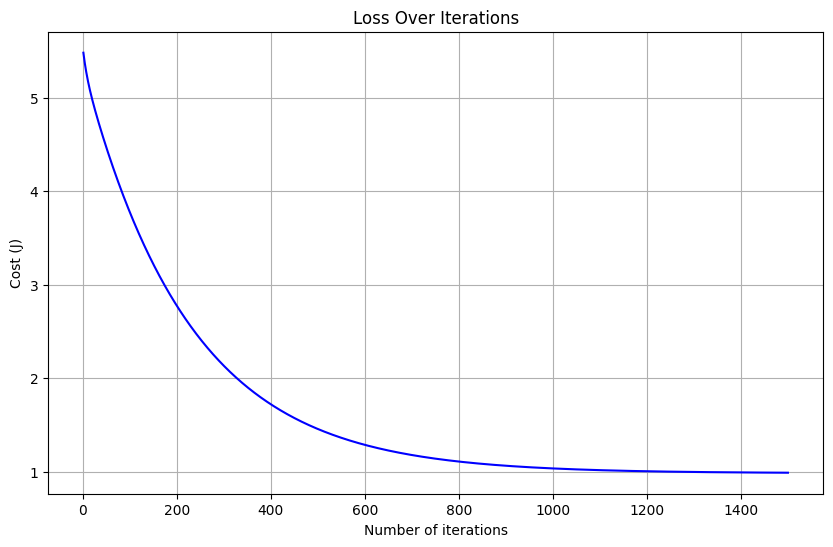

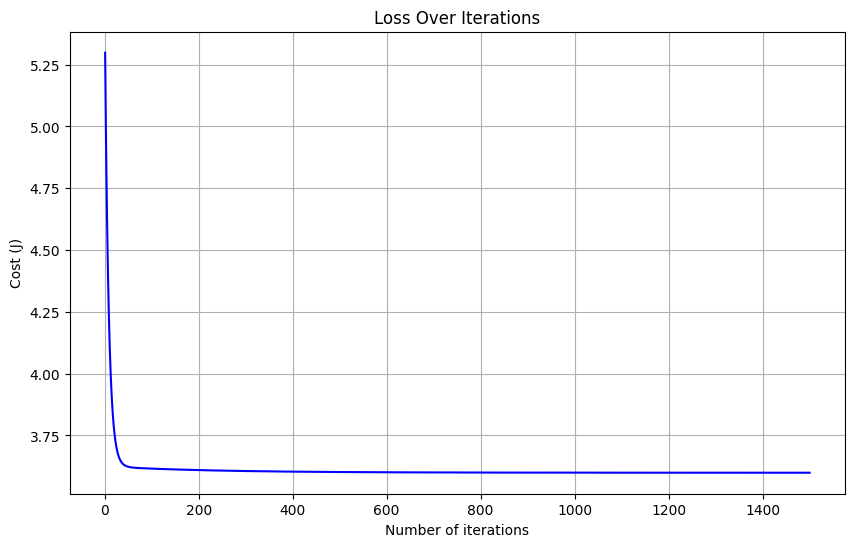

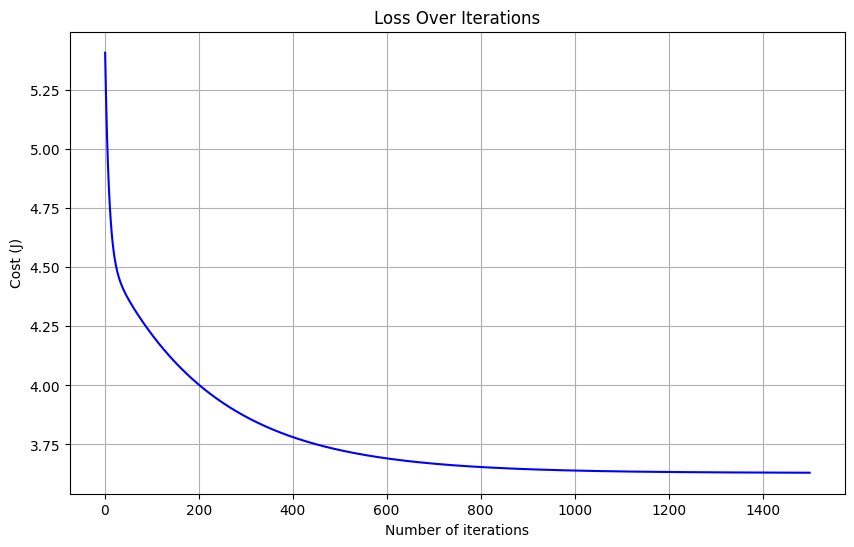

In [9]:
#Gradient Descent Graph of X1
plt.plot(range(1, iterations + 1), cost_history1, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss Over Iterations')

plt.show()

#-----------------------------------------------#

#Gradient Descent Graph of X2
plt.plot(range(1, iterations + 1), cost_history2, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss Over Iterations')

plt.show()

#-----------------------------------------------#

#Gradient Descent Graph of X3
plt.plot(range(1, iterations + 1), cost_history3, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss Over Iterations')

plt.show()

In [36]:
#Problem 2: Multivariable Gradient Descent
def compute_cost_multi(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(X)) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X, y, theta, alpha, iterations):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost_multi(X, y, theta)

    return theta, cost_history

theta = [0., 0.,0.]
iterations = 1500
alpha = 0.01

X1 = df.values[:,0] #Get input values from X1, first column
X2 = df.values[:,1] #Get input values from X2, second column
X3 = df.values[:,2] #Get input values from X3, third column
y = df.values[:,3] #Get output values from y, fourth column

# Assuming X1, X2, and X3 are matrices with data in them
X = np.column_stack((X1, X2, X3))  # Stack the matrices horizontally

# Initialize theta as an array of zeros with the same number of columns as X
theta = np.zeros(X.shape[1])


theta, cost_history_multi = gradient_descent_multi(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history_multi)

Final value of theta = [-1.25436101  1.39925697  0.50796906]
cost_history = [5.24646357 5.02314979 4.84134199 ... 2.2420132  2.2420132  2.2420132 ]


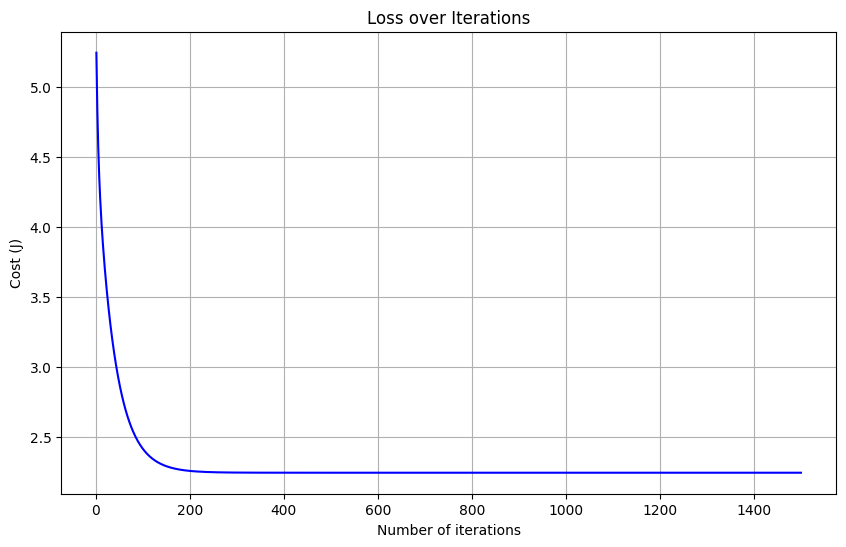

In [37]:
#Multivariable Loss over Iterations Graph
plt.plot(range(1, iterations + 1), cost_history_multi, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over Iterations')

plt.show()